<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/Project/Team5_finalv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: import

import tensorflow as tf
from tensorflow import keras

import os

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.constraints import maxnorm
from keras.layers import  Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = tf.keras.datasets.cifar10.load_data()

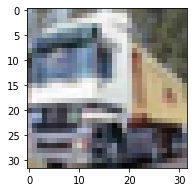

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()
#print(Y_Train)

In [4]:
#Step 2: Data pre-processiing 


#Normalize the dataset
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

# X_Train = X_Train/255.0
# X_Test= X_Test/255.0

#z-score
mean = np.mean(X_Train,axis=(0,1,2,3))
std = np.std(X_Train,axis=(0,1,2,3))
X_Train = (X_Train-mean)/(std+1e-7)
X_Test = (X_Test-mean)/(std+1e-7)

In [5]:
X_Train.shape

(50000, 32, 32, 3)

In [6]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [7]:
cifar_classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

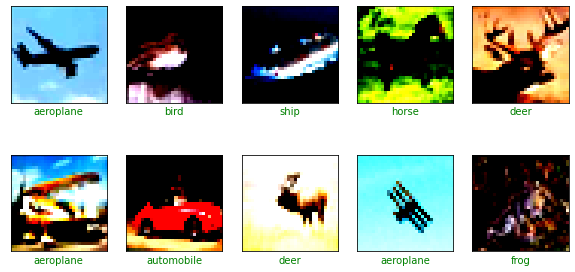

In [8]:
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    # show correct prediction in green and wrong in red
    col ='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(cifar_classes[np.argmax(p[i])],color=col)
  plt.show()

show_random_examples(X_Train,Y_Train,Y_Train)

In [9]:
#Check the shape of Y_Train
num_classes = Y_Train.shape[1]

In [10]:
#Step 3: Model Creation

weightPath = 'model_TermProject_Final.h5'

def modelGen(weights_path=None):
    model = None

    if weights_path != None:
        model = tf.keras.models.load_model('model_TermProject_Final.h5')
    else:
        weight_decay = 1e-4

        model = Sequential()

        model.add(Input(shape=(32,32,3)))

        model.add(Conv2D(32,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Conv2D(32,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        model.add(Conv2D(64,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Conv2D(64,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.3))

        model.add(Conv2D(128,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Conv2D(128,3,activation='elu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.4))

        model.add(Flatten())

        model.add(Dense(128, activation='elu'))
        model.add(Dropout(0.2))

        model.add(Dense(10, activation= 'softmax'))    

    return model


# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False
#     )
# datagen.fit(X_Train)


#compile the model

opt_rms = RMSprop(lr=0.001,decay=1e-6)

model = modelGen(weightPath)

model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [12]:
history = None
if weightPath == None:
  history = model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=50, batch_size=128,callbacks=[
                tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                   save_best_only=True,save_weights_only=False,
                                                   monitor='val_accuracy')
              ])
  
  # plot accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # plot loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  model.save('model_TermProject_Final.h5')

  print("Model saved!")

else:
  print("Model loaded from file!")

Model loaded from file!


In [13]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this model is: ", accuracy_*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.7068 - accuracy: 0.8533
Accuracy of this model is:  85.32999753952026


In [14]:
preds = model.predict(X_Test)

In [15]:
Y_Train.shape

(50000, 10)

In [16]:
preds.shape

(10000, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

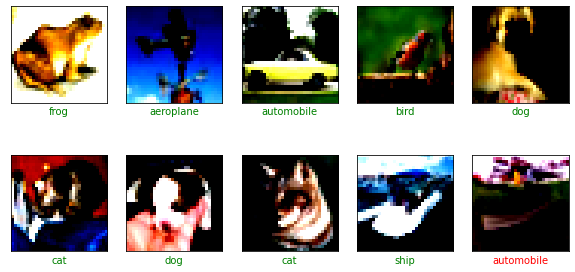

In [17]:
show_random_examples(X_Test,Y_Test,preds)

# Reading a single image and giving prediction

In [18]:
!ls

airplane8.png  cat.jpg	models	model_TermProject_Final.h5  sample_data


In [19]:
from google.colab.patches import cv2_imshow

In [20]:
imList = np.array([])

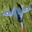

In [21]:
im = cv2.resize(cv2.imread('airplane8.png'), (32, 32)).astype(np.float32)
cv2_imshow(im)
imList = np.append(imList,im)

In [22]:
imList = imList.reshape(1, 32, 32, 3)

In [23]:
imList.shape

(1, 32, 32, 3)

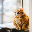

In [24]:
im = cv2.resize(cv2.imread('cat.jpg'), (32, 32)).astype(np.float32)
cv2_imshow(im)
imList = np.append(imList,im)

In [25]:
imList = imList.reshape(2, 32, 32, 3)

In [26]:
imList.shape

(2, 32, 32, 3)

In [27]:
# model.fit(datagen.flow(x_train, y_train, batch_size=32),
#           steps_per_epoch=len(x_train) / 32, epochs=epochs)

singlePred = model.predict(imList)

In [28]:
yImList = tf.keras.utils.to_categorical([0,3], num_classes=10)

In [29]:
def show_single_preds(x,y,p):
  for i in range(x.shape[0]):
    cv2_imshow(x[i])
    if np.argmax(y[i]) == np.argmax(p[i]):
      print(cifar_classes[np.argmax(p[i])])
      print("Correct")
    else:
      print(cifar_classes[np.argmax(p[i])])
      print("Incorrect")
    print("+++++++++++++++++++++++++++++")

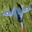

dog
Incorrect
+++++++++++++++++++++++++++++


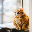

cat
Correct
+++++++++++++++++++++++++++++


In [30]:
show_single_preds(imList,yImList,singlePred)

# StreamLit

In [31]:
import streamlit as st
import json
import requests
import numpy as np

URI = 'http://127.0.0.1:5000'

st.title('Neural Network Visualizer')
st.sidebar.markdown('## Input Image')

if st.button('Get Random Prediction'):
  response = requests.post(URI, data={})
  response = json.loads(response.text)
  preds = response.get('prediction')
  image = response.get('image')
  image = np.reshape(image, (28,28))
  st.sidebar.image(image, width=150)

  for layer, p in enumerate(preds):
    numbers = np.squeeze(np.array(p))

    plt.figure(figsize=(32,4))

    if layer == 2:
      row = 1
      col = 10
    else:
      row = 2
      col = 16

    for i, number in enumerate(numbers):
      plt.subplot(row,col,i+1)
      plt.imshow(number * np.ones((8,8,3)).astype('float32'))
      plt.xticks([])
      plt.yticks([])

      if layer == 2:
        plt.xlabel(str(i), fontsize=40)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.tight_layout()
    st.text('Layer {}'.format(layer+1))
    st.pyplot()

ModuleNotFoundError: ignored